# Topic Modelling

Unsupervised text classification using **NMF** (Non-Negative Matrix Factorization)

> LDA (Latent Dirichlet Allocation) is another nice alternative for topic modelling.

In [1]:
bbc_articles_dataset = "https://codeberg.org/webdevcaptain/nlp-review/raw/branch/main/data/BBC_08_APR_17_to_08_JUN_2017.csv"

## Data loading and EDA

In [2]:
import pandas as pd

bbc = pd.read_csv(bbc_articles_dataset)

bbc.head(8)

,article,date,panda_date,headline,summary,url
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596


In [3]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     988 non-null    object
 1   date        988 non-null    object
 2   panda_date  988 non-null    object
 3   headline    988 non-null    object
 4   summary     988 non-null    object
 5   url         988 non-null    object
dtypes: object(6)
memory usage: 46.4+ KB


In [4]:
bbc['article'][0]

'Syria war: US warns of \'more\' after missile strikes The US envoy to the UN has warned America may take further action after bombarding a Syrian air base suspected of using chemical weapons. Nikki Haley said her country would not stand by when chemical weapons were used, as it was in its "vital interest" to stop their proliferation. Syrian ally Russia accused the US of encouraging "terrorists" with its unilateral actions. Moscow has promised to strengthen its ally Syria\'s anti-aircraft defences.  It is also closing down a hotline with the US designed to avoid collisions between their air forces over Syria. At least six people are reported to have been killed in the US missile strikes early on Friday. US officials say the base was used to launch a chemical weapons attack that killed dozens of civilians on Tuesday. According to Idlib\'s opposition-run health authority, 89 people, including 33 children and 18 women, died in the suspected nerve agent attack in the rebel-held town of Kha

In [5]:
print(f"No. of words in the 1st article is {len(bbc['article'][0].split(' '))}")

No. of words in the 1st article is 891


In [6]:
bbc['headline'][0]

"US warns Syria it's ready for 'more'"

In [7]:
bbc.columns

Index(['article', 'date', 'panda_date', 'headline', 'summary', 'url'], dtype='object')

#### Data transformation

Let's see the average number of words in every headline

In [8]:
bbc['word_titles'] = bbc['headline'].apply(lambda x: len(x.split()))
bbc['word_titles']

,word_titles
0,7
1,6
2,7
3,6
4,6
...,...
983,5
984,6
985,7
986,4


In [9]:
bbc.describe() # 6 words per headline on avg

,word_titles
count,988.000000
mean,6.167004
std,1.028196
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


In [10]:
bbc['word_titles'].value_counts()

,count
word_titles,
6,389
7,264
5,209
8,73
4,37
9,12
10,2
3,2


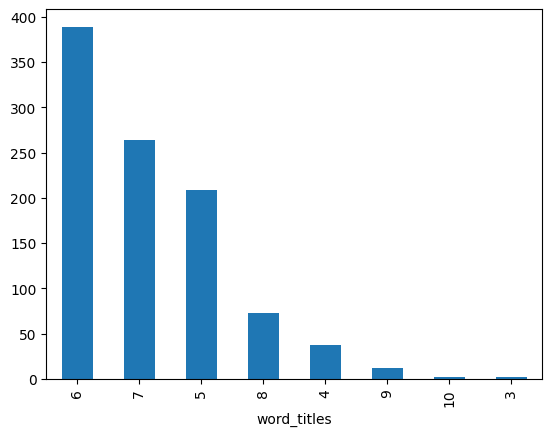

In [11]:
bbc['word_titles'].value_counts().plot(kind='bar');

In [12]:
# Let's beautify the plot

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

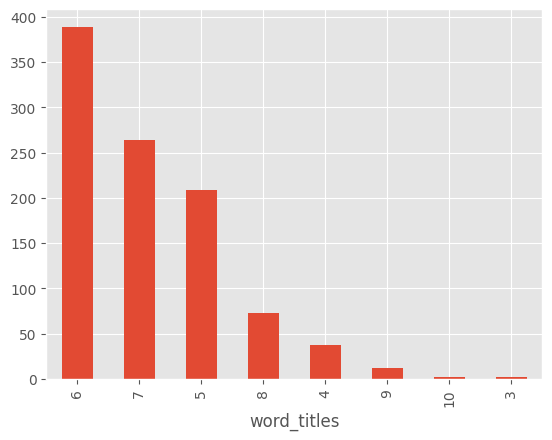

In [13]:
bbc['word_titles'].value_counts().plot(kind='bar');

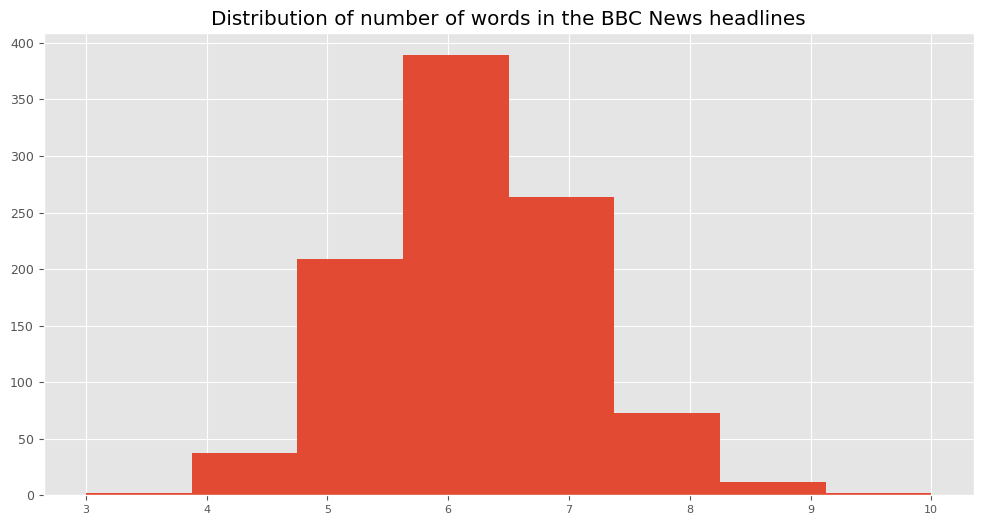

In [14]:
bbc[['word_titles']].hist(figsize=(12,6), bins=8, xlabelsize=8, ylabelsize=9);
plt.title("Distribution of number of words in the BBC News headlines");

### Let's join all the headlines to form a wordcloud from it

In [15]:
all_words = ''.join([word for word in bbc['headline'][:]])
all_words

"US warns Syria it's ready for 'more'Deaths as lorry rams Swedish storeNew PM Tshibala appointed in DR CongoNorway to build landmark ship tunnelTrump to make China state visitCanada province makes high heels optionalUber: We did not steal Google's techWoman injured in Westminster attack diesYouTube changes ad rules for new channelsSenate confirms Trump Supreme Court pickVenezuela governor 'banned from politics'Google adds search results 'fact checker'Venezuela governor 'banned from politics'Google adds search results 'fact checker'Travel websites 'misleading' customersTwitter wins anti-Trump privacy battleSamsung boss corruption trial beginsVenezuela march backs banned politicianEta caches 'had tonnes of weapons''Suspect device' in Sweden crash lorryDalai Lama's rapturous welcomeUS soldier is killed in AfghanistanDutch rallies after 'hand holding attack'North Korea 'vindicated' by Syria strikeCabin crew help woman give birthBoris Johnson calls off Moscow visitThree dead in Poland build

In [16]:
import wordcloud

wordcloud.__version__

'1.9.4'

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

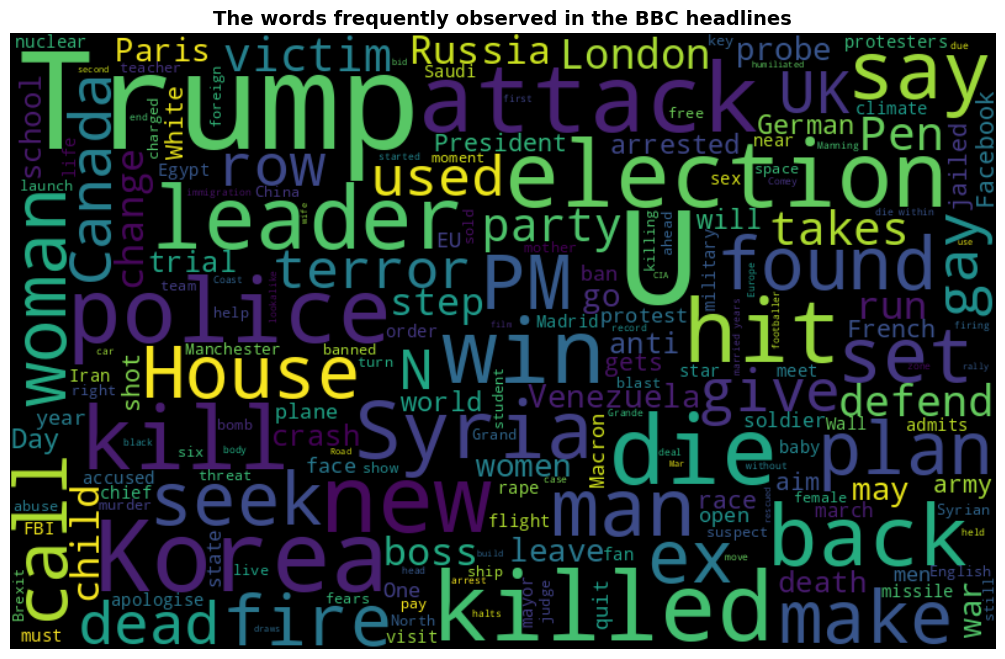

In [18]:
wordcloud = WordCloud(
  width=800,
  height=500,
  random_state=42,
  max_font_size=110
).generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('The words frequently observed in the BBC headlines', weight='bold', fontsize=14)
plt.show()

TF-IDF is a BoW (Bag of Words) method

**NMF** can use TF-IDF.

> LDA can only use raw term counts for LDA as it is a probablistic graphical model.


The headlines need to be proprocessed before they can be put into DTM

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

#### Creating the DTM (Document Term Matrix)

It's basically a matrix, with documents designated by rows and words by columns
dtm is constructed with TFIDF scores as entries so that words that are common across all the articles are down-weighted

In [20]:
dtm = vectorizer.fit_transform(bbc['article'].values.astype('U')) # The astype(‘U’) is telling numpy to convert the data to Unicode (essentially a string in python 3).

dtm # 988 rows (articles) and 12545 columns (words or tfidf scores)

<988x12545 sparse matrix of type '<class 'numpy.float64'>'
	with 156988 stored elements in Compressed Sparse Row format>

In [21]:
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_feature_names[:10], tfidf_feature_names[-10:]

(array(['00', '000', '000ft', '000km', '000m', '01', '011', '03', '04',
        '05'], dtype=object),
 array(['zinedine', 'zinke', 'zionist', 'zone', 'zones', 'zoo',
        'zuckerberg', 'zuma', 'zurcher', 'éric'], dtype=object))

In [22]:
tfidf_feature_names.shape

(12545,)

In [23]:
import numpy as np

In [24]:
words = np.array(vectorizer.get_feature_names_out())
words, len(words)

(array(['00', '000', '000ft', ..., 'zuma', 'zurcher', 'éric'], dtype=object),
 12545)

## NMF

In [25]:
from sklearn.decomposition import NMF
import random

Fitting the DTM to an NMF model

Estimate the NMF topic model on the corpus of BBC articles. Picking the number of topics (n_components) as 15.



In [26]:
nmf_model = NMF(n_components=15, random_state=42)
nmf_model.fit(dtm)

NMF(n_components=15, random_state=42)

> NMF gives values with the highest coefficient, not probabiltiy like with LDA

In [27]:
for index, topic in enumerate(nmf_model.components_):
  print(f'#{index}: {topic} ; {topic.argsort()[-10:]} -- ({topic.argmax()}, {topic[topic.argmax()]}), Topic Length: {len(topic)}')

  print([tfidf_feature_names[idx] for idx in topic.argsort()[-10:]])

  print('\n\n')

#0: [0.03087361 0.1901274  0.         ... 0.01858199 0.         0.        ] ; [ 7504  9954 12488  6967  7502  4415  3139  2909  8508  9848] -- (9848, 0.72505399868694), Topic Length: 12545
['ms', 'school', 'year', 'man', 'mr', 'family', 'death', 'court', 'police', 'said']



#1: [0.00135064 0.         0.         ... 0.00563314 0.         0.        ] ; [11297  6394  2230  8970 10558  7786  6444  7348  7755  6443] -- (6443, 1.0130371670659333), Topic Length: 12545
['test', 'kim', 'china', 'pyongyang', 'south', 'nuclear', 'korean', 'missile', 'north', 'korea']



#2: [9.59632274e-03 2.36425275e-05 0.00000000e+00 ... 2.38158378e-03
 1.17227059e-02 0.00000000e+00] ; [ 9807  6039 12310  8671  5586  9806  4462 11638  7502  2469] -- (2469, 0.6801188103082888), Topic Length: 12545
['russian', 'investigation', 'white', 'president', 'house', 'russia', 'fbi', 'trump', 'mr', 'comey']



#3: [0.02553806 0.0221036  0.         ... 0.         0.         0.00642276] ; [3911 7504 3972 7036 7502 4811 4777

With the estimated model, we check the top 15 most likely words in each topic with .components_

The components_ attribute of the estimated model is a topic-by-word matrix with each entry denoting the weight of the corresponding word in the corresponding topic.

We then go through this topic-by-word matrix row by row and print out the 15 most likely words for each row. Note that the words are printed out in increasing order of their weights.

In [28]:
for index, topic in enumerate(nmf_model.components_):
  print(f'The top 15 words for Topic#{index}')
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])

The top 15 words for Topic#0
['women', 'told', 'woman', 'murder', 'facebook', 'ms', 'school', 'year', 'man', 'mr', 'family', 'death', 'court', 'police', 'said']
The top 15 words for Topic#1
['launch', 'ballistic', 'military', 'missiles', 'tests', 'test', 'kim', 'china', 'pyongyang', 'south', 'nuclear', 'korean', 'missile', 'north', 'korea']
The top 15 words for Topic#2
['intelligence', 'clinton', 'senate', 'director', 'flynn', 'russian', 'investigation', 'white', 'president', 'house', 'russia', 'fbi', 'trump', 'mr', 'comey']
The top 15 words for Topic#3
['paris', 'party', 'round', 'candidate', 'candidates', 'election', 'ms', 'emmanuel', 'marine', 'mr', 'french', 'france', 'pen', 'le', 'macron']
The top 15 words for Topic#4
['government', 'air', 'weapons', 'al', 'said', 'russian', 'iran', 'rebel', 'assad', 'attack', 'zones', 'russia', 'chemical', 'syrian', 'syria']
The top 15 words for Topic#5
['streets', 'elections', 'mr', 'protesters', 'tear', 'assembly', 'president', 'government', 'v

Let's combine topics with original data.

Calling .transform() on vectorized articles to attach a label number.

Latent themes are observed.

In [29]:
bbc_topics = nmf_model.transform(dtm)

In [30]:
bbc_topics, len(bbc_topics)

(array([[0.        , 0.03367167, 0.        , ..., 0.00513149, 0.        ,
         0.        ],
        [0.03352634, 0.        , 0.00685107, ..., 0.01480432, 0.00319772,
         0.01517239],
        [0.        , 0.00108642, 0.01261904, ..., 0.00840407, 0.0322986 ,
         0.01985163],
        ...,
        [0.03436202, 0.00075661, 0.        , ..., 0.        , 0.02058868,
         0.00303095],
        [0.00658642, 0.01652058, 0.        , ..., 0.12870062, 0.        ,
         0.        ],
        [0.01376673, 0.        , 0.        , ..., 0.00746477, 0.00412876,
         0.        ]]),
 988)

In [31]:
bbc_topics[0], len(bbc_topics[0])

(array([0.        , 0.03367167, 0.        , 0.        , 0.33856943,
        0.00040425, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05785644, 0.00513149, 0.        , 0.        ]),
 15)

In [32]:
bbc_topics[1].argsort()

array([ 1,  3,  4,  6,  9, 10, 13,  5,  2,  8, 12, 14, 11,  0,  7])

In [33]:
bbc_topics[1].argmax() # argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion.

7

In [34]:
# I came up with some topic labels

bbc_topiclabels = {
  0: 'Crime Victims & Public Safety',
  1:'Foreign Defense: North Korea',
  2:'US Politics',
  3:'Euro: French Politics',
  4:'International Relations: War & Conflict',
  5:'Venezuela',
  6:'US Foreign Policy',
  7:'UK Security & Terrorism',
  8:'UK Politics: Brexit',
  9:'Latin American Politics',
  10:'Sport',
  11:'Afghanistan: Extremist',
  12:'Travel',
  13:'Egypt',
  14:'Turkey'
}

In [35]:
bbc['title'] = bbc_topics.argmax(axis=1)

In [36]:
bbc['title']

,title
0,4
1,7
2,5
3,11
4,6
...,...
983,0
984,7
985,7
986,12


Let's map my topiclabels to these articles.

In [37]:
bbc['topic_label'] = bbc['title'].map(bbc_topiclabels)

In [38]:
bbc['headline']

,headline
0,US warns Syria it's ready for 'more'
1,Deaths as lorry rams Swedish store
2,New PM Tshibala appointed in DR Congo
3,Norway to build landmark ship tunnel
4,Trump to make China state visit
...,...
983,Uber 'obtained rape victim's records'
984,Family's tribute to London attack victim
985,Police warn bald men after ritual attack
986,Burmese military plane vanishes


In [39]:
bbc['topic_label']

,topic_label
0,International Relations: War & Conflict
1,UK Security & Terrorism
2,Venezuela
3,Afghanistan: Extremist
4,US Foreign Policy
...,...
983,Crime Victims & Public Safety
984,UK Security & Terrorism
985,UK Security & Terrorism
986,Travel


In [40]:
bbc.head()

,article,date,panda_date,headline,summary,url,word_titles,title,topic_label
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...,7,4,International Relations: War & Conflict
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132,7,5,Venezuela
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,11,Afghanistan: Extremist
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828,6,6,US Foreign Policy


In [41]:
bbc2 = bbc.groupby('title').count()['article']

bbc2

,article
title,
0,262
1,39
2,57
3,33
4,44
5,34
6,108
7,75
8,63


## Let's model only UK based topics

UK topics are 0, 3, 7 and 8 in our topic labels.

In [42]:
bbc_UKtopics = bbc.loc[bbc['title'].isin([0,3,7,8])]

bbc_UKtopics.head()

,article,date,panda_date,headline,summary,url,word_titles,title,topic_label
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117,6,8,UK Politics: Brexit
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347,7,0,Crime Victims & Public Safety
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596,6,7,UK Security & Terrorism
8,"YouTube channels need 10,000 views for adverts...",Saturday 08 April 2017,8-Apr-17,YouTube changes ad rules for new channels,YouTube video creators will now have to pass a...,http://www.bbc.com/news/technology-39527043,7,0,Crime Victims & Public Safety


### Let's form the wordcloud again

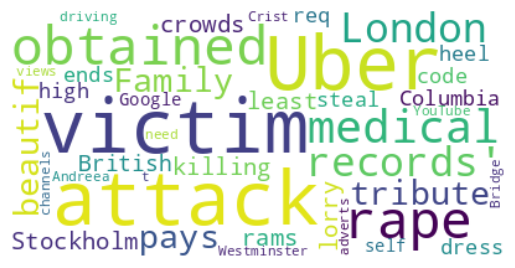

In [43]:
text = str(bbc_UKtopics.article) # Joining all articles to form a wordcloud

# wordcloud = WordCloud().generate(text)
# stopwords = set(STOPWORDS)

wordcloud = WordCloud(max_font_size=60, max_words=40, background_color='white').generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
# Let's inspect the weights

wordcloud.words_

{'Uber': 1.0,
 'attack': 1.0,
 'victim': 1.0,
 'obtained': 0.6666666666666666,
 'rape': 0.6666666666666666,
 'medical': 0.6666666666666666,
 "records'": 0.6666666666666666,
 'London': 0.6666666666666666,
 'Family': 0.6666666666666666,
 'pays': 0.6666666666666666,
 'tribute': 0.6666666666666666,
 'beautif': 0.6666666666666666,
 'Stockholm': 0.3333333333333333,
 'lorry': 0.3333333333333333,
 'rams': 0.3333333333333333,
 'crowds': 0.3333333333333333,
 'killing': 0.3333333333333333,
 'least': 0.3333333333333333,
 'British': 0.3333333333333333,
 'Columbia': 0.3333333333333333,
 'ends': 0.3333333333333333,
 'high': 0.3333333333333333,
 'heel': 0.3333333333333333,
 'dress': 0.3333333333333333,
 'code': 0.3333333333333333,
 'req': 0.3333333333333333,
 'steal': 0.3333333333333333,
 'Google': 0.3333333333333333,
 'self': 0.3333333333333333,
 'driving': 0.3333333333333333,
 't': 0.3333333333333333,
 'Westminster': 0.3333333333333333,
 'Bridge': 0.3333333333333333,
 'Andreea': 0.3333333333333333,
